# PS05

## Name: Xinyu Chang

---

In [56]:
# import the packages
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import numpy as np

### 1 When will we hit 2C of global warming?

#### 1. Load data. Ensure it looks good.

In [57]:
hadcrut_data = pd.read_csv("hadcrut-5.0.1.0-annual.csv", sep=",")

In [58]:
hadcrut_data.shape

(173, 4)

In [59]:
hadcrut_data.head()

,Time,Anomaly (deg C),Lower confidence limit (2.5%),Upper confidence limit (97.5%)
0,1850,-0.417659,-0.589203,-0.246115
1,1851,-0.233350,-0.411868,-0.054832
2,1852,-0.229399,-0.409382,-0.049416
3,1853,-0.270354,-0.430009,-0.110700
4,1854,-0.291630,-0.432824,-0.150436


There are 173 columns and 4 rows in the dataset. The first 5 lines of data look reasonable and the data fits the type that the column defines.

In [60]:
hadcrut_data.isna().sum()

Time                              0
Anomaly (deg C)                   0
Lower confidence limit (2.5%)     0
Upper confidence limit (97.5%)    0
dtype: int64

There is no missing value in the dataset.

#### 2. Make a plot of the temperature anomaly for all years in the dataset. Describe what you see–how has the global temperature behaved through the last 170 years?

In [61]:
# Rename the column
new_data = hadcrut_data.rename(columns={
    'Anomaly (deg C)': 'anomaly',
    'Lower confidence limit (2.5%)': 'lower_confidence',
    'Upper confidence limit (97.5%)': 'upper_confidence'
})
new_data

,Time,anomaly,lower_confidence,upper_confidence
0,1850,-0.417659,-0.589203,-0.246115
1,1851,-0.233350,-0.411868,-0.054832
2,1852,-0.229399,-0.409382,-0.049416
3,1853,-0.270354,-0.430009,-0.110700
4,1854,-0.291630,-0.432824,-0.150436
...,...,...,...,...
168,2018,0.762654,0.731052,0.794256
169,2019,0.891073,0.856787,0.925358
170,2020,0.922794,0.888212,0.957376
171,2021,0.761856,0.725443,0.798268


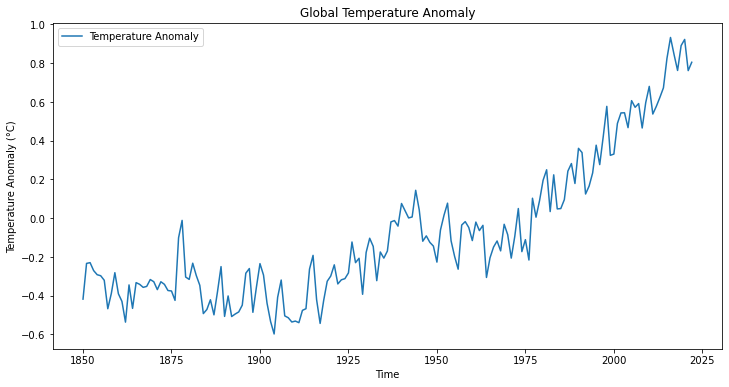

In [62]:
plt.figure(figsize=(12, 6))
plt.plot(new_data['Time'], new_data['anomaly'], label='Temperature Anomaly')
plt.xlabel('Time')
plt.ylabel('Temperature Anomaly (°C)')
plt.title('Global Temperature Anomaly')
plt.legend()
plt.show()

This plot illustrates the changes in global temperature anomalies over the last 170 years. Throughout the time period, the global temperature fluctuates, but there is a distinct upward trend. Remarkably, the last 125 years show a fairly constant upward trend, highlighting the accelerated pace of global warming during this period. A particularly striking observation is the dramatic temperature increase from 1975 to 2021, as the anomaly rises from about -0.2°C to 0.8°C. 

---

#### 1. Compute the baseline anomaly (for 1850-1900).

In [63]:
baseline_data = new_data.loc[(new_data['Time'] <= 1900) &
                             (new_data['Time'] >= 1850)].anomaly.mean()
baseline_data

-0.3565021707254903

The baseline anomaly for 1850 - 1900 is approximately -0.3565°C.

#### 2. Make a plot that shows the last 60 years of data, overlied with the regression line.In your opinion–does the regression line describe the trend well?

In [64]:
recent_data = new_data[(new_data['Time'] >= 1963) & (new_data['Time'] <= 2022)]
recent_data.head(10)

,Time,anomaly,lower_confidence,upper_confidence
113,1963,-0.036806,-0.090570,0.016958
114,1964,-0.305867,-0.349492,-0.262241
115,1965,-0.204388,-0.253574,-0.155202
116,1966,-0.148885,-0.198392,-0.099377
117,1967,-0.117516,-0.160625,-0.074408
118,1968,-0.168632,-0.213253,-0.124011
119,1969,-0.031367,-0.071865,0.009132
120,1970,-0.085107,-0.126081,-0.044132
121,1971,-0.205933,-0.244507,-0.167358
122,1972,-0.093827,-0.131717,-0.055937


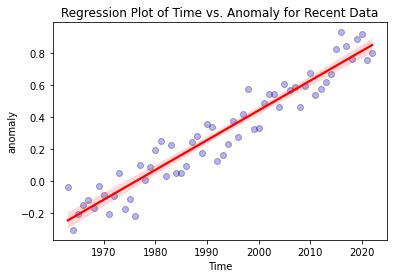

In [65]:
_ = sns.regplot(x="Time",
                y="anomaly",
                scatter_kws={"color": "blue", "alpha": 0.3,
                             "edgecolor": "black"},
                line_kws={"color": "red"},
                data=recent_data)

_ = plt.title("Regression Plot of Time vs. Anomaly for Recent Data")
_ = plt.show()

For my opinoin, the regression line describe the trend well because all the data spread near the regression line and the slope of the regression line fits the trend of how the data spreading in the graph. The regression line closely follow the pattern of the data points, capturing the overall upward trend in the temperature anomalies over the last 60 years (1963-2022).

#### 3. (2pt) Keep in mind that we have a problem with this dataset: Anomaly is reported with reference to the 1961-1990 period. In order to normalize the data, create a new column that describes the temperature anomaly above the pre-industrial baseline (that is what you calculated in Q1.1 above).

In [66]:
def diff_value(row):
    return row['anomaly'] - baseline_data

In [67]:
def diff_year(row):
    return row['Time'] - 2000

In [68]:
new_data['Baseline_value_Diff'] = new_data.apply(lambda row: diff_value(row),
                                                 axis=1)
new_data['Time_Diff'] = new_data.apply(lambda row: diff_year(row), axis=1)
new_data

,Time,anomaly,lower_confidence,upper_confidence,Baseline_value_Diff,Time_Diff
0,1850,-0.417659,-0.589203,-0.246115,-0.061157,-150.0
1,1851,-0.233350,-0.411868,-0.054832,0.123152,-149.0
2,1852,-0.229399,-0.409382,-0.049416,0.127103,-148.0
3,1853,-0.270354,-0.430009,-0.110700,0.086148,-147.0
4,1854,-0.291630,-0.432824,-0.150436,0.064872,-146.0
...,...,...,...,...,...,...
168,2018,0.762654,0.731052,0.794256,1.119156,18.0
169,2019,0.891073,0.856787,0.925358,1.247575,19.0
170,2020,0.922794,0.888212,0.957376,1.279296,20.0
171,2021,0.761856,0.725443,0.798268,1.118358,21.0


By observing the table, the difference between the baseline value difference is -0.06 in year 1850.

#### 4. Estimate a linear regression model where you describe the anomaly above the preindustrial baseline (this is what you calculated in Q1.3 above) as a function of years. How large is R2? What does this number tell you?

In [69]:
new_60_data = new_data.loc[(new_data['Time'] <= 2022) &
                           (new_data['Time'] >= 1962)]
new_60_data.head()

,Time,anomaly,lower_confidence,upper_confidence,Baseline_value_Diff,Time_Diff
112,1962,-0.064054,-0.117314,-0.010794,0.292448,-38.0
113,1963,-0.036806,-0.090570,0.016958,0.319696,-37.0
114,1964,-0.305867,-0.349492,-0.262241,0.050635,-36.0
115,1965,-0.204388,-0.253574,-0.155202,0.152114,-35.0
116,1966,-0.148885,-0.198392,-0.099377,0.207618,-34.0


In [70]:
m1 = smf.ols("Baseline_value_Diff ~ Time_Diff", data=new_60_data).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Baseline_value_Diff   R-squared:                       0.916
Model:                             OLS   Adj. R-squared:                  0.914
Method:                  Least Squares   F-statistic:                     642.6
Date:                 Sun, 07 May 2023   Prob (F-statistic):           2.06e-33
Time:                         07:08:57   Log-Likelihood:                 55.328
No. Observations:                   61   AIC:                            -106.7
Df Residuals:                       59   BIC:                            -102.4
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8003      0.014     57.292      0.000       0.772       0.828
Time_Diff      0.0183      0.001     25.349      0.000       0.017       0.020
==============================================================================
Omnibus:                        2.185   Durbin-Watson:                   1.607
Prob(Omnibus):                  0.335   Jarque-Bera (JB):                1.401
Skew:                           0.062   Prob(JB):                        0.496
Kurtosis:                       2.268   Cond. No.                         21.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-squared value for this model is 0.916(close to 1), which means that 91.6% of the variation in the anomaly above the preindustrial baseline is explained by the linear relationship with Time Difference. In other words, 91.6% of the variation in the anomaly can be predicted by the year. This high R-squared value indicates that the model provides a good fit to the data and is useful for predicting the values of the dependent variable based on the independent variable.

#### 5. Interpret the coefficients. What does the slope mean? Is it statistically significant?

The slope coefficient (0.0183) represents the estimated increase in the anomaly above the preindustrial baseline per year after 2000. This means that for each additional year after 2000, the anomaly above the preindustrial baseline is estimated to increase by 0.0183 degrees, on average. The coefficient is statistically significant (P < 0.05) based on the t-statistic (25.349) and the associated p-value (0.000), indicating that there is strong evidence to suggest that the global temperature has been increased in the last 60 years.

#### 6. What does the intercept mean if (a) you use years as is (1999, 2000, 2001, . . . )?(b) you use years relative to 2000 (-1, 0, 1, . . . )?Is it statistically significant?

In [71]:
m2 = smf.ols("Baseline_value_Diff ~ Time", data=new_60_data).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Baseline_value_Diff   R-squared:                       0.916
Model:                             OLS   Adj. R-squared:                  0.914
Method:                  Least Squares   F-statistic:                     642.6
Date:                 Sun, 07 May 2023   Prob (F-statistic):           2.06e-33
Time:                         07:09:05   Log-Likelihood:                 55.328
No. Observations:                   61   AIC:                            -106.7
Df Residuals:                       59   BIC:                            -102.4
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -35.8214      1.439    -24.894      0.000     -38.701     -32.942
Time           0.0183      0.001     25.349      0.000       0.017       0.020
==============================================================================
Omnibus:                        2.185   Durbin-Watson:                   1.607
Prob(Omnibus):                  0.335   Jarque-Bera (JB):                1.401
Skew:                           0.062   Prob(JB):                        0.496
Kurtosis:                       2.268   Cond. No.                     2.25e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.25e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In both situations, the intercept represents the estimated value of the dependent variable (i.e., 'Baseline_value_Diff') when the independent variable (i.e., 'Time' or 'Time_Diff') is equal to zero. However, the interpretation of the intercept is slightly different in the two situations.

(a) When using years as is (1999, 2000, 2001, ...), the intercept value of -35.8214 means that the estimated 'Baseline_value_Diff' is -35.8214 degree when the 'Time' variable is equal to zero(in year 0). However, in the real situation, it is really unrealistic that the average temperature is -35.8214 when the year is 0. Additionally, if we use the years as they are (1999, 2000, 2001, etc.), the intercept represents the estimated temperature anomaly above the pre-industrial baseline at year 0. However, this interpretation is not particularly meaningful or pertinent because the dataset begins in 1850 and 0 is well outside the range of data.

(b) When using years relative to 2000 (-1, 0, 1, ...), the intercept value of 0.8003 means that the estimated 'Baseline_value_Diff' is 0.8003 degree when the 'Time_Diff' variable is equal to zero. Since 'Time_Diff' is the time difference between the current year and the reference year (2000), this intercept value represents the estimated baseline value of the dependent variable in the reference year (2000).

To determine if the intercept is statistically significant, we can look at the p-value associated with the intercept coefficient in each regression. In both situations(p-value=0.000), the p-value are smaller than 0.05, which means that the intercept is statistically significant at the 0.05 level. This suggests that the estimated baseline value in the reference year (2000) is significantly different from zero.

#### 7. Use the intercept and slope, and compute how much above the pre-industrial baseline is the world now, in 2022.

In [72]:
baseline_2022 = m1.params[0] + m1.params[1] * (2022 - 2000)
baseline_2022

1.20317920895484

In 2022, there are 1.2032 above the pre-industrial baseline.

#### 8.Now use the slope and intercept to find which year will the trend hit 1.5C, and when will it hit 2C.

Based on the m1 formula: baseline value difference = 0.0183 * time difference + 0.8003. We can infer: time difference = (baseline value difference - 0.8003)/0.0183.

In [73]:
hit_1 = (1.5 - m1.params[0]) / m1.params[1] + 2000
hit_2 = (2 - m1.params[0]) / m1.params[1] + 2000
print("hit 1.5C:",hit_1)
print("hit 2C:",hit_2)

hit 1.5C: 2038.210077934273
hit 2C: 2065.516247891563


Approximately in 2038, the temperature anomaly will reach 1.5 degrees Celsius. Approximately in 2065, the temperature anomaly will reach 2 degrees Celsius.

#### 9. Now think about these two threshold years you computed. What do you think, might the thresholds be actually crossed earlier or later than what you computed, or maybe not at all? What does it depend on? Can you improve your model to make your predictions better?

Due to the impact of nonlinear factors such as feedback loops, tipping points, or unanticipated changes in human behavior or policies, it is conceivable that the temperature anomaly will surpass the 1.5C or 2C threshold earlier than anticipated. In addition, it is true that the linear regression model may not encompass the entirety of the climate system's complexity and variable interactions. Incorporating additional variables or refining the data to better account for the effects of natural variability, regional differences, and other factors that may influence the temperature anomaly is one method to improve the model's accuracy.Using more sophisticated statistical methods or machine learning algorithms that can capture nonlinear relationships or interactions between variables is another method for enhancing the model. It is essential to observe, however, that every model is merely an approximation of reality and is subject to uncertainty and error. In order to estimate the temperature trajectory and assess the risk of exceeding the 1.5C or 2C threshold, it is crucial to employ multiple models, data sources approaches.

Also, there are several ways to improve the R-squared value of the linear regression model used to analyze the temperature anomaly data. One approach is to incorporate additional variables or refine the data to better account for the effects of natural variability, regional differences, and other factors that may influence the temperature anomaly. This may involve gathering more detailed or precise data on climate-related variables, or using advanced statistical techniques to better account for the complexity of the climate system.

### 2 How Is Basketball Game Score Calculated?

#### 1. Load data (harden-21-22.csv). Do basic checks.

In [74]:
nba_data = pd.read_csv("harden-21-22.csv", sep=",")
nba_data

,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,1.0,2021-10-19,32-054,BRK,@,MIL,L (-23),1,30:38,...,5,8,8,1,2,4,3,20,17.6,-20
1,2,2.0,2021-10-22,32-057,BRK,@,PHI,W (+5),1,38:25,...,6,7,8,2,0,5,0,20,15.6,-1
2,3,3.0,2021-10-24,32-059,BRK,NaN,CHO,L (-16),1,33:09,...,5,7,8,1,1,8,5,15,6.4,-15
3,4,4.0,2021-10-25,32-060,BRK,NaN,WAS,W (+14),1,30:25,...,5,6,9,1,1,2,1,14,11.9,+6
4,5,5.0,2021-10-27,32-062,BRK,NaN,MIA,L (-13),1,35:36,...,7,7,7,1,1,4,3,14,10.7,-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,79,62.0,2022-04-03,32-220,PHI,@,CLE,W (+4),1,40:34,...,6,10,10,0,0,4,2,21,19.9,+4
79,80,63.0,2022-04-05,32-222,PHI,@,IND,W (+9),1,40:17,...,3,3,14,1,0,4,2,11,12.1,+7
80,81,64.0,2022-04-07,32-224,PHI,@,TOR,L (-5),1,39:27,...,4,4,15,0,0,3,1,13,14.1,+7
81,82,65.0,2022-04-09,32-226,PHI,NaN,IND,W (+13),1,38:40,...,4,4,14,1,0,5,2,22,19.8,+12


In [75]:
nba_data.shape

(83, 30)

In [76]:
nba_data.columns

Index(['Rk', 'G', 'Date', 'Age', 'Tm', 'Unnamed: 5', 'Opp', 'Unnamed: 7', 'GS',
       'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-'],
      dtype='object')

In [77]:
nba_data.isna().sum()

Rk             0
G             18
Date           0
Age            0
Tm             0
Unnamed: 5    41
Opp            0
Unnamed: 7     0
GS             0
MP             0
FG             0
FGA            0
FG%            0
3P             0
3PA            0
3P%            0
FT             0
FTA            0
FT%            1
ORB            0
DRB            0
TRB            0
AST            0
STL            0
BLK            0
TOV            0
PF             0
PTS            0
GmSc           0
+/-            0
dtype: int64

There are 83 rows and 30 coumns in the dataset. The G column(season game for Harden) has a total of 18 missing values and the Unnamed: 5 column has 41 missing values.

#### 2.These data also include games where he did not play. Find how many games did James Harden actually play in this season.

In [78]:
games_played = nba_data[nba_data['G'].notna()].shape[0]
print("Games played:", games_played)

Games played: 65


Harden played 65 games in the season.

#### 3. Clean the data and ensure the relevant variables are of numeric type so we can use those in the regression models. It is your task to find what is wrong with the data in its present form (it is downloaded directly from basketball-reference.com), and fix these issues.

In [79]:
new_nba_data = nba_data[nba_data.G.notna()].copy()

In [80]:
numeric_columns = ['GmSc', 'FGA', 'GS', 'FG', '3P', '3PA', 'FT', 'FTA',
                   'ORB', 'DRB', 'AST', 'STL', 'BLK', 'TOV', 'PF']
new_nba_data[numeric_columns] = new_nba_data[numeric_columns].apply(pd.to_numeric)

In [81]:
new_nba_data.head()

,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,1.0,2021-10-19,32-054,BRK,@,MIL,L (-23),1,30:38,...,5,8,8,1,2,4,3,20,17.6,-20
1,2,2.0,2021-10-22,32-057,BRK,@,PHI,W (+5),1,38:25,...,6,7,8,2,0,5,0,20,15.6,-1
2,3,3.0,2021-10-24,32-059,BRK,NaN,CHO,L (-16),1,33:09,...,5,7,8,1,1,8,5,15,6.4,-15
3,4,4.0,2021-10-25,32-060,BRK,NaN,WAS,W (+14),1,30:25,...,5,6,9,1,1,2,1,14,11.9,+6
4,5,5.0,2021-10-27,32-062,BRK,NaN,MIA,L (-13),1,35:36,...,7,7,7,1,1,4,3,14,10.7,-12


#### 4. Analyze the game score GmSc. What is its range? Mean? Standard deviation? Which distribution does the histogram resemble?

In [82]:
mean = np.mean(new_nba_data.GmSc)
std = np.std(new_nba_data.GmSc)
min_gmsc = new_nba_data['GmSc'].min()
max_gmsc = new_nba_data['GmSc'].max()
gmsc_range = np.max(new_nba_data.GmSc) - np.min(new_nba_data.GmSc)
print("range:", gmsc_range)
print("mean:", mean)
print("standard deviation:", std)
print("min value:", min_gmsc)
print("max value:", max_gmsc)

range: 36.699999999999996
mean: 19.61384615384615
standard deviation: 8.168944511861358
min value: 1.1
max value: 37.8


The range of the game score GmSc is 36.7(from 1.1 to 37.8), the mean is 19.61 and the standard deviation is 8.17.

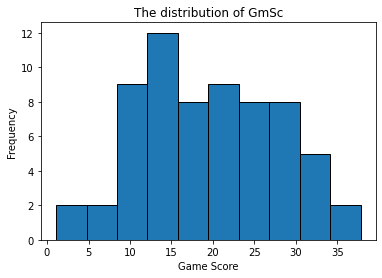

In [83]:
plt.hist(new_nba_data['GmSc'], bins=10, edgecolor='black')
plt.title('The distribution of GmSc')
plt.xlabel("Game Score")
plt.ylabel("Frequency")
plt.show()

The graph shows that the distribution of the GmSc is almost a normal distribution. The distribution is approximately normal with mean around 20 and range from almost 0 to close to 40. When the game score is 15, it has a largest frequency with the value of 12. On the other hand, when the game score is lower than 10 or higher than 35, it has a smallest frequency with the value of 2.

#### 5. First, let’s run a simple regression model explaining game score GmSc by field goal attempts FGA.

In [84]:
m3 = smf.ols('GmSc ~ FGA', data=new_nba_data).fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   GmSc   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     9.678
Date:                Sun, 07 May 2023   Prob (F-statistic):            0.00280
Time:                        07:09:46   Log-Likelihood:                -224.11
No. Observations:                  65   AIC:                             452.2
Df Residuals:                      63   BIC:                             456.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.8748      3.582      2.477      0.016       1.716      16.034
FGA            0.7037      0.226      3.111      0.003       0.252       1.156
==============================================================================
Omnibus:                        0.246   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.884   Jarque-Bera (JB):                0.198
Skew:                          -0.127   Prob(JB):                        0.906
Kurtosis:                       2.905   Cond. No.                         59.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(a) The intercept (β0) is 8.8748. This means that when the number of field goal attempts (FGA) is 0, the expected game score (GmSc) is 8.8748, on average. In other words, it is the baseline game score before any field goal attempts are taken into account.

(b) The slope for FGA (β1) is 0.7037. This means that for each additional field goal attempt, the expected game score (GmSc) increases by 0.7037, on average. The p-value for FGA is 0.003, which is less than 0.05, indicating that the relationship between field goal attempts and game score is statistically significant. This implies that there is a positive relationship between the number of field goal attempts and the game score.

#### 6. Next, let’s analyse how is game score related to field goals (FG) and field goal attempts (FGA).

In [85]:
m4 = smf.ols('GmSc ~ FG + FGA', data=new_nba_data).fit()
m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   GmSc   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     45.30
Date:                Sun, 07 May 2023   Prob (F-statistic):           7.49e-13
Time:                        07:09:49   Log-Likelihood:                -199.48
No. Observations:                  65   AIC:                             405.0
Df Residuals:                      62   BIC:                             411.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.9917      2.472      3.637      0.001       4.049      13.934
FG             3.0427      0.363      8.383      0.000       2.317       3.768
FGA           -0.5523      0.216     -2.553      0.013      -0.985      -0.120
==============================================================================
Omnibus:                        0.422   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.810   Jarque-Bera (JB):                0.069
Skew:                          -0.025   Prob(JB):                        0.966
Kurtosis:                       3.151   Cond. No.                         64.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(a) The interpretation of FG (Field Goals, β1) is that for each additional field goal made, the game score (GmSc) increases by approximately 3.0427 points, on average, holding FGA (Field Goal Attempts) constant. FG is statistically significant, as its p-value is less than 0.05 (P>|t| = 0.000), indicating that the relationship between FG and GmSc is not due to chance, and there is a positive relationship between the game score and field goals (FG).

(b) The interpretation of FGA (Field Goal Attempts, β2) is that for each additional field goal attempt, the game score (GmSc) decreases by approximately 0.5523 points, on average, holding FG(Field Goals) constant. FGA is statistically significant, as its p-value is less than 0.05 (P>|t| = 0.013), indicating that the relationship between FGA and GmSc is not due to chance, and there is a negative relationship between the game score and Field Goal Attempts(FGA).

(c) In Model 1, FGA has a positive estimate, while in Model 2, it has a negative estimate. The intuitive explanation for this is that in a simple regression (Model 1), FGA may be positively related to GmSc because, on average, more attempts lead to more points scored. However, in the multiple regression (Model 2), where the effect of FG is accounted for, the negative relationship between FGA and GmSc suggests that when controlling for the number of successful field goals, more attempts may actually be associated with a lower game score. This could be because missing more shots results in a lower shooting efficiency. The difference between interpreting slope in simple regression(Model1) and multiple regression(Model 2) lies in the fact that in multiple regression, the effect of each independent variable is estimated while controlling for the effects of other independent variables in the model. Therefore, the relationship between an independent variable and the dependent variable may change depending on the other variables included in the model.


(d) The R-squared of Model 2 is 0.594, which indicates that approximately 59.4% of the variance in the game score can be explained by the FG and FGA variables. This is a significant improvement from the R-squared value of 0.133 in Model 1, which only included the FGA variable.Comparing the R-squared values of the two models, it is clear that Model 2 is a better fit into the regression model, as it explains a larger proportion of the variance in the game score. This suggests that the addition of the FG variable in Model 2 provides valuable information and improves the model's ability to predict game scores based on the FG and FGA variables.

#### 7. Now include all the independent numerical variables, i.e. FG, FGA, 3P, 3PA, FT,FTA, ORB, DRB, AST, STL, BLK, TOV, PF into the model. Estimate it, and discuss the results.

In [86]:
m5 = smf.ols("GmSc ~ FGA + FG + FT + FTA + ORB + DRB + AST + STL + BLK \
              + TOV + PF + Q('3P') + Q('3PA') ",
             data=new_nba_data).fit()
m5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   GmSc   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.599e+30
Date:                Sun, 07 May 2023   Prob (F-statistic):               0.00
Time:                        07:09:50   Log-Likelihood:                 2021.4
No. Observations:                  65   AIC:                            -4015.
Df Residuals:                      51   BIC:                            -3984.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.599e-14    7.5e-15     -2.130      0.038   -3.11e-14    -9.2e-16
FGA           -0.7000   4.85e-16  -1.44e+15      0.000      -0.700      -0.700
FG             2.4000   7.34e-16   3.27e+15      0.000       2.400       2.400
FT             1.4000    1.4e-15      1e+15      0.000       1.400       1.400
FTA           -0.4000   1.16e-15  -3.46e+14      0.000      -0.400      -0.400
ORB            0.7000   1.05e-15   6.64e+14      0.000       0.700       0.700
DRB            0.3000   4.97e-16   6.03e+14      0.000       0.300       0.300
AST            0.7000      4e-16   1.75e+15      0.000       0.700       0.700
STL            1.0000   1.14e-15   8.77e+14      0.000       1.000       1.000
BLK            0.7000   1.61e-15   4.35e+14      0.000       0.700       0.700
TOV           -1.0000   6.73e-16  -1.48e+15      0.000      -1.000      -1.000
PF            -0.4000   8.85e-16  -4.52e+14      0.000      -0.400      -0.400
Q('3P')        1.0000   1.26e-15   7.96e+14      0.000       1.000       1.000
Q('3PA')   -3.331e-16   8.26e-16     -0.403      0.688   -1.99e-15    1.32e-15
==============================================================================
Omnibus:                        1.986   Durbin-Watson:                   2.215
Prob(Omnibus):                  0.371   Jarque-Bera (JB):                1.905
Skew:                          -0.402   Prob(JB):                        0.386
Kurtosis:                       2.758   Cond. No.                         182.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(a) In this model, the standard errors are extremely small (close to zero), which results in very large t-values (in the order of 10^14 or 10^15). This indicates that the estimated coefficients are highly significant.

(b) The R-squared of this model is 1.000, which means that 100% of the variance in the game score can be explained by the included independent variables (FG, FGA, 3P, 3PA, FT, FTA, ORB, DRB, AST, STL, BLK, TOV, PF). This tells us that the game score is calculated directly from these variables, and the model perfectly captures the relationship between the game score and the included variables.

(c) The results show that the coefficient for turnover (TOV) is -1.0000, and its p-value is 0.000, which means it is statistically significant. The negative coefficient indicates that turnovers are bad for the team, as the game score (GmSc) decreases by approximately 1.0000 points, on average, holding other variables constant. This suggests that minimizing turnovers is crucial for improving a team's performance.

#### 8. (6pt) Finally, consult the game score explanation at https://www.nbastuffer.com/analytics101/game-score/. Did you recover the same formula?

Yes, the formula we obtained in question 7 matches the Game Score formula provided by the NBAstuffer website. The Game Score formula, as given on the website, is:

Game Score = (Points) + 0.4*(Field Goals) - 0.7*(Field Goal Attempts) - 0.4*(Free Throw Attempts - Free Throws) + 0.7*(Offensive Rebounds) + 0.3*(Defensive Rebounds) + (Steals) + 0.7*(Assists) + 0.7*(Blocked Shots) - 0.4*(Personal Fouls) - (Turnovers)

Comparing the coefficients in our model (from question 7) with the formula above, we can see that they match:

Points: FG * 2 + 3P * 1 + FT * 1  
0.4 * Field Goals: 0.4 * FG  
0.7 * Field Goal Attempts: -0.7 * FGA  
0.4 * (Free Throw Attempts - Free Throws): -0.4 * (FTA - FT)  
0.7 * Offensive Rebounds: 0.7 * ORB  
0.3 * Defensive Rebounds: 0.3 * DRB  
Steals: 1 * STL  
0.7 * Assists: 0.7 * AST  
0.7 * Blocked Shots: 0.7 * BLK  
0.4 * Personal Fouls: -0.4 * PF  
Turnovers: -1 * TOV  

The coefficients for 3P (3-point shots made) and 3PA (3-point shots attempted) are also included in the model and are 1.0000 and close to 0 (-3.331e-16), respectively. However, the p-value for 3PA is 0.688, indicating that it is not statistically significant. Since 3P is already accounted for in the Points and FG variables, the model still matches the Game Score formula.








### 3 Interpret regression results in the literature

#### 1. Do those who have a partner have better mental health (as measured by PHQ-9)? Is the effect statistically significant?

Based on the table, the estimate of having a partner is -0.47, which suggests that those who have a partner have slightly better mental health as measured by the PHQ-9, since a lower PHQ-9 score indicates better mental health. However, the p-value is 0.150, which is higher than the conventional significance threshold of 0.05. This means that the effect is not statistically significant, and we cannot confidently conclude that having a partner has a significant impact on mental health.

#### 2. What is the effect of COVID exposure? Is it improving or worsening mental health? Is the effect statistically significant?

Based on the table, the estimate of COVID-19 exposure is 0.24. This suggests that COVID-19 exposure is associated with a worsening of mental health, as a higher PHQ-9 score indicates worse mental health. However, the p-value is 0.129, which is higher than the conventional significance threshold of 0.05. This means that the effect is not statistically significant, and we cannot confidently conclude that COVID-19 exposure has a significant impact on mental health.

#### 3. How is Financial distress related to mental health? Is the effect statistically significant?

Based on the table, the estimate of financial distress is 2.32. This suggests that financial distress is associated with a worsening of mental health, as a higher PHQ-9 score indicates worse mental health. The p-value is <0.001, which is well below the conventional significance threshold of 0.05. This means that the effect is statistically significant, and we can confidently conclude that financial distress has a significant impact on mental health.

### I spent 13 hours in this homework.